# Trump Tweets

## Goal: to explore different perspectives of data analysis regarding President Trump's tweets

Credit to the team at Data100 Spring 2018 for the code outline and prompt

In [22]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

from pathlib import Path
import json

### Tweets downloaded in Spring 2018 using Twitter's API. Skipped here for brevity.

In [23]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    with open(path, "r") as f:
        tweets = json.load(f)
    return tweets

In [24]:
trump_tweets = load_tweets("got_the_tweets.json");
print("Number of tweets:", len(trump_tweets))

Number of tweets: 3223


In [25]:
## Merging with some even older tweets Data100 took a snapshot of
dest_path = "data/old_trump_tweets.json.zip"
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open("old_trump_tweets.json", "r") as f:
    old_trump_tweets = json.load(f)

In [26]:
alltweets = {}
for twt in old_trump_tweets:
    nxt = {twt['id']:twt}
    alltweets.update(nxt)

for twt in trump_tweets:
    nxt = {twt['id']:twt}
    alltweets.update(nxt)

all_tweets = []

for key, value in alltweets.items():
    all_tweets.append(value)

len(all_tweets)

6798

### Constructing the Data Frame

In [27]:
trump = pd.DataFrame.from_dict(all_tweets)

trump['time'] = [pd.to_datetime(x) for x in [i [4:] for i in trump['created_at']]]
texts = []
for i in range(len(trump)):
    if str(trump['text'][i]) != "nan" :
        texts.append(trump['text'][i])
    else:
        texts.append(trump['full_text'][i])
trump['text'] = texts

trump.set_index('id', inplace=True)

trump = trump.loc[:,['time','source', 'text','retweet_count']]


trump.head()

,time,source,text,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915
786201435486781440,2016-10-12 13:46:43,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609
786189446274248704,2016-10-12 12:59:05,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329
786054986534969344,2016-10-12 04:04:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789
786007502639038464,2016-10-12 00:56:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761


### Removing the HTML tags

In [28]:
trump['source'] = (trump['source'].str.replace('^</?a.*\">', '')
                   .str.replace('</a>', '')
                  )
trump.head()

,time,source,text,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915
786201435486781440,2016-10-12 13:46:43,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609
786189446274248704,2016-10-12 12:59:05,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329
786054986534969344,2016-10-12 04:04:47,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789
786007502639038464,2016-10-12 00:56:06,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761


# Tweet Counts Across Devices
Code chunk below written by Data100 team

Text(0,0.5,'Number of Tweets')

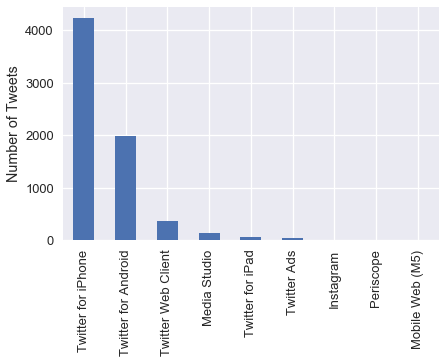

In [29]:
from datetime import datetime
ELEC_DATE = datetime(2016, 11, 8)
INAUG_DATE = datetime(2017, 1, 20)
assert set(trump[(trump['time'] > ELEC_DATE) & (trump['time'] < INAUG_DATE) ]['source'].unique()) == set(['Twitter Ads',
 'Twitter Web Client',
 'Twitter for Android',
 'Twitter for iPhone'])
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")

## Difference in Tweet Behavior Across Devices?

### Over Time in One Day

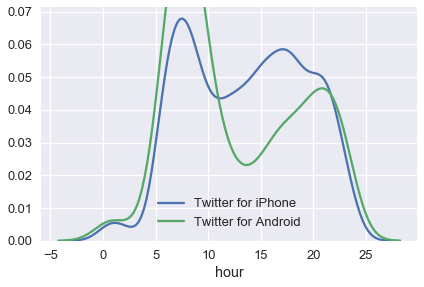

In [30]:
trump['est_time'] = (
    trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump['hour'] = trump.est_time.dt.hour + trump.est_time.dt.minute/60 + trump.est_time.dt.second/(60**2)
tiphone = trump[trump['source'] == 'Twitter for iPhone']
tandroid = trump[trump['source'] =='Twitter for Android']
sns.distplot(tiphone['hour'], label='Twitter for iPhone', hist=False)
sns.distplot(tandroid['hour'], label='Twitter for Android', hist=False)
plt.legend();

Twitter for Android had a higher peak around 7-8am and another around 9. Twitter for iPhone has peaks around similar times, except its second peak starts earlier (4-5pm-ish) and is fatter.

Assuming that he tweets before he starts and after he finishes his day, I would guess that the Android is most likely his. 

### Over the Years

In [31]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


trump['year'] = trump['time'].apply(year_fraction)

/Users/katiawilliams/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/katiawilliams/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


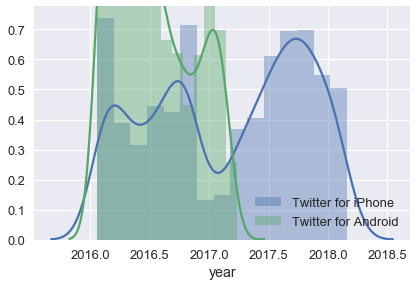

In [32]:
tiphone.loc[:, "dayofyear"] = [it.timetuple().tm_yday for it in tiphone.loc[:, "est_time"]]
tiphone.loc[:, "year"] = (tiphone.loc[:, "est_time"].dt.year 
                         + tiphone.loc[:, 'dayofyear']/365
                         + tiphone.loc[:, 'hour']/24/365
                        )


tandroid.loc[:,'dayofyear'] = [it.timetuple().tm_yday for it in tandroid.loc[:, "est_time"]]
tandroid.loc[:,'year'] = (tandroid.loc[:, "est_time"].dt.year 
                         + tandroid.loc[:, 'dayofyear']/365
                         + tandroid.loc[:, 'hour']/24/365
                        )
sns.distplot(tiphone.loc[:, 'year'], label='Twitter for iPhone')
sns.distplot(tandroid.loc[:, 'year'], label='Twitter for Android')
plt.legend();

## Sentiment of Tweets?

### Using the provided vader_lexicon table

In [33]:
sent = pd.DataFrame(pd.read_table('vader_lexicon.txt', header=None).set_index(0).iloc[:,0])

sent['polarity'] = sent[1]
sent.drop(1, axis='columns', inplace=True)
trump['text'] = [str.lower(i) for i in trump['text']]

In [34]:
punct_re = r'([^\w (\n)])'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')

In [35]:
tidy_format = pd.DataFrame(trump['no_punc']
               .str.split(expand=True)
               .stack())
tidy_format.reset_index(inplace=True)
tidy_format.set_index('id', drop=True, inplace=True)
tidy_format.rename(columns = {'level_1':'num', 0:'word'}, inplace=True)
tidy_format.index.name=None
tidy_format.head()

,num,word
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary


In [36]:
pol = tidy_format.merge(sent, 'left', left_on='word', right_index=True)
pol = pol.groupby(pol.index).agg(sum).drop(['num'], axis=1)
trump = trump.merge(pol, 'outer', left_index=True, right_index=True)

#### Most Negative Tweets

In [37]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   horrible and cowardly terrorist attack on innocent and defenseless worshipers in egypt. the world cannot tolerate terrorism, we must defeat them militarily and discredit the extremist ideology that forms the basis of their existence!

   democrat jon ossoff would be a disaster in congress. very weak on crime and illegal immigration, bad for jobs and wants higher taxes. say no

   "@fiiibuster: @jeffzeleny pathetic - you have no sufficient evidence that donald trump did not suffer from voter fraud, shame! bad reporter.

   nyc terrorist was happy as he asked to hang isis flag in his hospital room. he killed 8 people, badly injured 12. should get death penalty!

   yet another terrorist attack today in israel -- a father, shot at by a palestinian terrorist, was killed while:
https://t.co/cv1hzkvbit


#### Most Positive Tweets

In [38]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   thank you to linda bean of l.l.bean for your great support and courage. people will support you even more now. buy l.l.bean. @lbperfectmaine

   it was my great honor to celebrate the opening of two extraordinary museums-the mississippi state history museum &amp; the mississippi civil rights museum. we pay solemn tribute to our heroes of the past &amp; dedicate ourselves to building a future of freedom, equality, justice &amp; peace. https://t.co/5akgvpv8aa

   rt @ivankatrump: 2016 has been one of the most eventful and exciting years of my life. i wish you peace, joy, love and laughter. happy new…

   today, it was my great honor to sign a new executive order to ensure veterans have the resources they need as they transition back to civilian life. we must ensure that our heroes are given the care and support they so richly deserve! https://t.co/0mdp9ddias https://t.co/lp2a8kcbap

   it was my great honor to welcome mayor’s from across america to the wh. my ad

### When Tweets Contain nyt or fox, what is their sentiment?

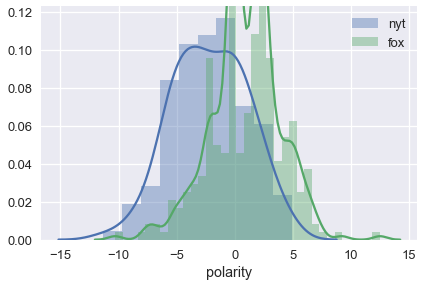

In [41]:
nyt = trump[['nyt' in  tweet for tweet in list(trump['no_punc'])]]
fox = trump[['fox' in  tweet for tweet in list(trump['no_punc'])]]

sns.distplot(nyt['polarity'].fillna(0), label = 'nyt')
sns.distplot(fox['polarity'].fillna(0), label='fox')
plt.legend();

## Did Certain Tweets Lead to More Retweets?

### Did Tweets Containing Certain Words Lead to Retweets?

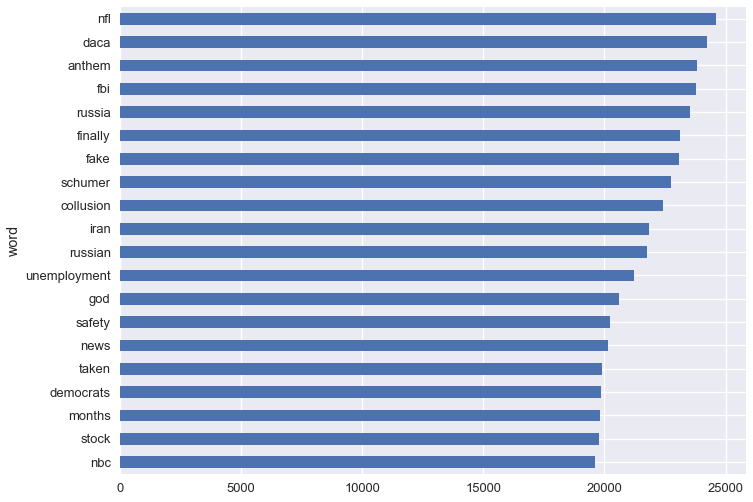

In [43]:
rtwts_per_word = (trump
                  .merge(tidy_format, 'outer', left_index=True, right_index=True)
                  .loc[:,['retweet_count', 'word'] ])

one_per_tweet = (tidy_format
                 .groupby([tidy_format.index, 'word'])
                 .count())

tweets_per_word = (one_per_tweet
                   .groupby('word')
                   .count())

atleast25 = tweets_per_word[tweets_per_word['num'] > 24]
atleast25.rename(columns={'num':'tweet_count'})

top_20 = pd.DataFrame(rtwts_per_word
          .merge(atleast25, 'right', left_on= 'word', right_index=True)
          .groupby('word')
          .agg('median')
          .sort_values("retweet_count", ascending=False)
          .iloc[:20, 0]
                     )
top_20['retweet_count'].sort_values().plot.barh(figsize=(10, 8));

## Are there trends in sentiment across devices?

/Users/katiawilliams/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/katiawilliams/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


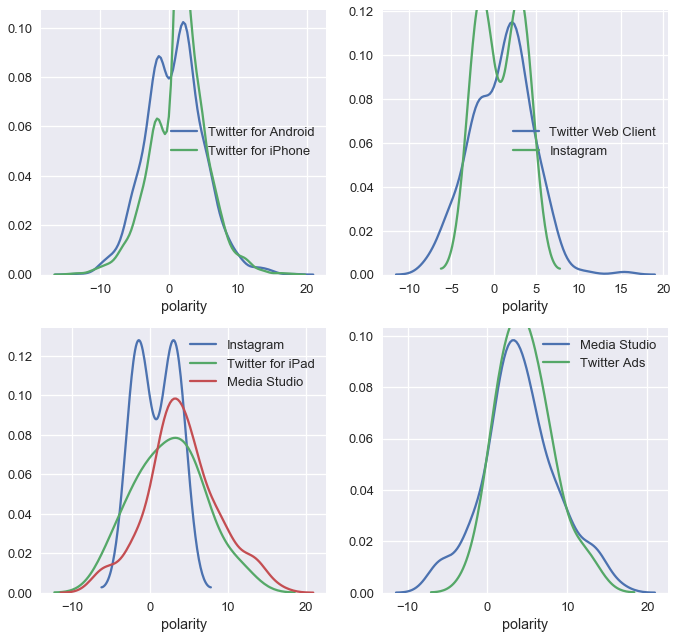

In [58]:
sourcepolarity = trump.groupby(['est_time', 'source']).sum()
sourcepolarity.reset_index(level=1, inplace=True)

fig, ax = plt.subplots(figsize=(10,10),ncols=2, nrows=2)

for source in trump['source'].unique()[0:2]:
    sns.distplot(sourcepolarity[sourcepolarity['source'] == source]['polarity'],
                       label=source,
                      hist=False,
                ax=ax[0][0])

for source in trump['source'].unique()[np.array([2,4])]:
    sns.distplot(sourcepolarity[sourcepolarity['source'] == source]['polarity'],
                 label=source,
                 hist=False,
                 ax=ax[0][1]
                )
    
for source in trump['source'].unique()[4:7]:
    sns.distplot(sourcepolarity[sourcepolarity['source'] == source]['polarity'],
                 label=source,
                 hist=False,
                ax=ax[1][0])

for source in trump['source'].unique()[np.array([6,8])]:
    sns.distplot(sourcepolarity[sourcepolarity['source'] == source]['polarity'],
                 label=source,
                 hist=False,
                ax=ax[1][1])
plt.legend();

### Notes:

The Twitter for iPhone polarity is skewed positive, as is pretty much everything else (but less so) which is interesting to me since Trump's overall tweeting is usually seen as negative.

The Twitter for iPhone polarity and Instragram polarity distributions are bimodal, with the local min right around zero. I'm not sure what it means by the post being from instagram (I'm not on social media, can you tweet an instagram post?) but posts from Instagram are more likely to be slightly negative or postive than neutral. 